In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
409501,416616.0,42.0,Male,23.0,16.0,3.0,13.0,Basic,Quarterly,611.52,17.0,0.0
126192,130264.0,58.0,Male,8.0,5.0,7.0,28.0,Standard,Quarterly,869.00,7.0,1.0
51167,52012.0,58.0,Male,2.0,29.0,3.0,22.0,Standard,Quarterly,555.00,14.0,1.0
152035,156846.0,32.0,Female,53.0,27.0,6.0,15.0,Standard,Annual,961.00,10.0,1.0
333776,340891.0,49.0,Male,11.0,9.0,1.0,19.0,Standard,Annual,671.17,19.0,0.0


In [4]:
df.drop(columns='CustomerID',inplace=True)

In [5]:
df.isna().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
df[df['Age'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.iloc[199295]

Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [8]:
df.dropna(inplace=True)

In [9]:
df[df['Age'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [10]:
df.dtypes

Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [11]:
df.Age.unique()

array([30., 65., 55., 58., 23., 51., 39., 64., 29., 52., 22., 48., 24.,
       49., 19., 47., 42., 57., 27., 59., 21., 60., 35., 18., 56., 20.,
       63., 25., 28., 32., 38., 37., 31., 53., 41., 33., 26., 36., 44.,
       34., 61., 40., 45., 46., 54., 43., 50., 62.])

In [12]:
def print_unique_col_values(df):
    for column in df:
        print (f'{column} : {df[column].unique()}\n' )

In [13]:
print_unique_col_values(df)

Age : [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]

Gender : ['Female' 'Male']

Tenure : [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]

Usage Frequency : [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]

Support Calls : [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]

Payment Delay : [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]

Subscription Type : ['Standard' 'Basic' 'Premium']

Contract Length : ['Annual' 'Monthly' 'Quarterly']

Total Spend : [932.   557.   185.   ... 829.59 804.3  959.47]

In [14]:
pd.to_numeric(df.Age)

0         30.0
1         65.0
2         55.0
3         58.0
4         23.0
          ... 
440828    42.0
440829    25.0
440830    26.0
440831    28.0
440832    31.0
Name: Age, Length: 440832, dtype: float64

In [15]:
df["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [16]:
print_unique_col_values(df)

Age : [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]

Gender : [1 0]

Tenure : [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]

Usage Frequency : [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]

Support Calls : [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]

Payment Delay : [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]

Subscription Type : ['Standard' 'Basic' 'Premium']

Contract Length : ['Annual' 'Monthly' 'Quarterly']

Total Spend : [932.   557.   185.   ... 829.59 804.3  959.47]

Last Inter

In [17]:
# hot end coding // using pd.get_dummies

In [18]:
df2 = pd.get_dummies(data=df,columns=['Subscription Type','Contract Length'])
df2.head(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,1,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,1,0,0
1,65.0,1,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,0,1,0
2,55.0,1,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,0,0,1


In [19]:
# scaling using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale=['Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [21]:
print_unique_col_values(df2)

Age : [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]

Gender : [1 0]

Tenure : [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]

Usage Frequency : [0.44827586 0.         0.10344828 0.68965517 0.65517241 0.82758621
 0.37931034 0.24137931 0.13793103 0.27586207 0.17241379 0.55172414
 0.75862069 0.4137931  0.51724138 0.89655172 0.03448276 0.93103448
 0.96551724 0.48275862 0.79310345 0.06896552 0.72413793 0.86206897
 1.         0.20689655 0.34482759 0.5862069  0.62068966 0.31034483]

Support Calls : [0.5 1.  0.6 0.7 0.9 0.3 0.4 0.2 0.  0.1 0.8]

Payment Delay : [0.6        0.26666667 0.23333333 0.86666667 0.53333333 0.5
 0.13333333 0.36666667 1.       

In [22]:
# Modeling

test traing split

In [23]:
from sklearn.model_selection import train_test_split

x= df2.drop(columns=['Churn'],axis='column')
y= df2['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [24]:
x.shape

(440832, 14)

## model bulding (ANN) using keras / tensorflow

In [25]:
# pip install tensorflow
# pip install keras

In [26]:
import tensorflow as tf

In [27]:
from tensorflow import keras

In [31]:
model = keras.Sequential([
    keras.layers.Dense(14,input_shape=(14,) , activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
11021/11021 [==============================] - 36s 3ms/step - loss: 0.3026 - accuracy: 0.8752
Epoch 2/5
11021/11021 [==============================] - 35s 3ms/step - loss: 0.1953 - accuracy: 0.9196
Epoch 3/5
11021/11021 [==============================] - 31s 3ms/step - loss: 0.1882 - accuracy: 0.9238
Epoch 4/5
11021/11021 [==============================] - 31s 3ms/step - loss: 0.1847 - accuracy: 0.9256
Epoch 5/5
11021/11021 [==============================] - 33s 3ms/step - loss: 0.1765 - accuracy: 0.9302


In [32]:
# predicting y (churn) values for x_test

In [33]:
yp = model.predict(x_test)
yp[:5]

2756/2756 [==============================] - 6s 2ms/step


array([[1.        ],
       [1.        ],
       [0.02711159],
       [0.00589965],
       [0.9999974 ]], dtype=float32)

In [35]:
y_pred = []
for i in yp:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [36]:
y_test[:10]

76072     1.0
177391    1.0
303286    0.0
281873    0.0
145303    1.0
38442     1.0
312002    0.0
419882    0.0
102262    1.0
142177    1.0
Name: Churn, dtype: float64

In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     38135
         1.0       0.96      0.92      0.94     50032

    accuracy                           0.94     88167
   macro avg       0.93      0.94      0.94     88167
weighted avg       0.94      0.94      0.94     88167



Text(95.72222222222221, 0.5, 'Truth')

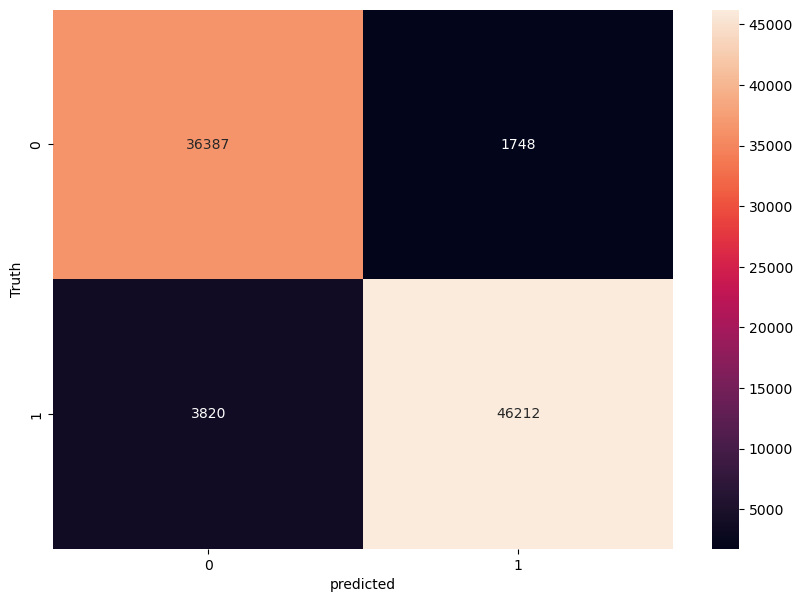

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [47]:
y_test.shape

(440832,)

## Accuracy

In [52]:
round((36387+46212)/(36387+46212+3820+1740),3)

0.937

### Precision for 0 class . i.e - precision for customers who did not churn

In [56]:
round((36387)/(36387+3820),3)

0.905

### Precision for 1 class . i.e - precision for customers who actually churned

In [58]:
round((46212)/(46212+1740),3)

0.964

### Recall for 0 class

In [59]:
round(36387/(36387+1740),2)

0.95

In [60]:
round((46212)/(46212+3820),2)

0.92